# Fonis Datageeks
## Workshop: Data Preparation. Tuning. Ensembles
Pripremili: 
<br>[Dimitrije Milenković](https://www.linkedin.com/in/dimitrijemilenkovicdm/)
<br>[Milica Perišić](https://www.linkedin.com/in/perisicmilica/)
<br>[Sanja Rančić]()

Komentare, sugestije i primedbe možete slati na:
<br>dimitrijemilenkovic.dm@gmail.com
<br>milicaperisic507@gmail.com
<br>sanjarancic0@gmail.com 
***

Kako smo do sada prešli osnovne koncepte klasifikacije i regresije, sada ćemo to znanje proširiti. Naučićemo kako da pripremimo podatke i izbacimo smeće, pre nego što pristupimo samoj izgradnji prediktivnog modela. 

Pored toga, naučićemo kako da podesimo parametre modela kako bi model bio što bolji i susrećemo se prvi put sa ansambli algoritmima kroz njihovog predstavnika Random Forest.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/telco_churn.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

In [4]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Učitali smo dataset sa podacima o korisnicima Telekoma. Svaki red predstavlja jednog korisnika, dok kolone predstavljaju atribute korisnika kao sto su država, minuti koje potroši u toku dana, u toku noći itd. <br>
Kolona churn nam pokazuje da li će korisnik napustiti mrežu ili ne. Ovo je jako važno za poslovanje Telekoma i iz tog razloga mi ćemo upravo to i predviđati.

In [5]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [6]:
df.describe(include=['object'])

,state,phone number,international plan,voice mail plan
count,3333,3333,3333,3333
unique,51,3333,2,2
top,WV,370-8262,no,no
freq,106,1,3010,2411


## Priprema podataka

Pre nego da naučimo model, potrebno je da pripremimo podatke za njega tako da on bude sposoban da nauči pravila. Za početak, potrebno je da izbacimo kolone za koje je jasno da nemaju prediktivnu moć. Takva je kolona phone number u našem datasetu, što je zapravo jedinstveni ID svakog korisnika. Tu kolonu možemo izbaciti iz dataseta a postaviti je za index redova. 

In [75]:
df.index = df['phone number']
df.drop(columns=['phone number'], inplace=True) 
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
phone number,,,,,,,,,,,,,,,,,,,,
382-4657,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
371-7191,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
358-1921,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
375-9999,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
330-6626,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Koristimo `inplace = True` kako bi promenili objekat nad kojim pozivamo funkciju drop.
U slučaju da je `inplace = False`, poziv metode vraća kopiju izmenjenog dataframe (bez kolone phone number), a originalni df ostaje nepromenjen.

### Rad sa kategoričkim podacima

#### Transformacija binarnih podataka

Kada smo ranije describe-ovali kolone, primetili smo da, pored churna, postoje još dve kolone tipa object. To su sledeće:

In [76]:
df[['international plan', 'voice mail plan']].head()

,international plan,voice mail plan
phone number,,
382-4657,no,yes
371-7191,no,yes
358-1921,no,no
375-9999,yes,no
330-6626,yes,no


S obzirom da algoritmi za izgradnju modela rade isključivo sa numeričkim podacima potrebno je ove kategoričke podatke transformisati u numeričke. 

Kada imamo binarne kategorije (yes/no) njih lako možemo opisati tako što ćemo ih enkodovati u 0 ili 1. Takve podatke kasnije možemo tumačiti kao prisustvo/odsustvo određene osobine, što one zapravo i predstavljaju (npr. da li korisnik ima international plan? 0 (no) ili 1 (yes). 

In [8]:
y_n_map_dict = {
    'yes' : 1,
    'no' : 0
}
df['international plan'] = df['international plan'].replace(y_n_map_dict)
df['voice mail plan'] = df['voice mail plan'].replace(y_n_map_dict)

Ovu transformaciju postižemo tako što definišemo rečnik u kome ključevi predstavljaju stvarne vrednosti kolone, a vrednosti vrednosti kojim želimo da ih zamenimo. Pozivanjem replace metode nad kolonom dešava se trasformacija, pa tako dobijamo numeričke vrednosti u ove dve kolone.

In [9]:
df[['international plan', 'voice mail plan']].head()

,international plan,voice mail plan
0,0,1
1,0,1
2,0,0
3,1,0
4,1,0


Pored binarnih kolona, u datasetu imamo i state kategoričku osobinu, koja može uzimati više različitih vrednosti.

In [78]:
df['state'].value_counts() # ostace kategoricka

WV    106
MN     84
NY     83
AL     80
OR     78
WI     78
OH     78
WY     77
VA     77
CT     74
ID     73
VT     73
MI     73
TX     72
UT     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
CO     66
NV     66
WA     66
MS     65
RI     65
MA     65
AZ     64
MO     63
FL     63
ME     62
ND     62
NM     62
NE     61
DE     61
OK     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64

Međutim, iako prepoznata kao numerička, jasno je da kolona `area code` predstavlja kategoriju i da je ne želimo tumačiti kao numeričku.

In [10]:
df['area code'].value_counts() # prepoznata kao numericka, ali je zapravo kategoricka

415    1655
510     840
408     838
Name: area code, dtype: int64

In [11]:
df['area code'] = df['area code'].astype('object') # pretvaramo u kategoricku

In [12]:
df[['state', 'area code']].head()

,state,area code
0,KS,415
1,OH,415
2,NJ,415
3,OH,408
4,OK,415


In [13]:
df.info() # vidimo da je i area code tipa object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null object
phone number              3333 non-null object
international plan        3333 non-null int64
voice mail plan           3333 non-null int64
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64


#### Dummy Variables

Već je pomenuto ranije, na radionici o Regresiji, da kategoričke kolone koje mogu uzeti više vrednosti obično enkodujemo na dva načina:
- za ordinalne kategorije dovoljan je LabelEncoder u 0,1,2,3... 
- za nominalne kategorije koristili smo OneHotEncoder za kreiranje dummy varijabli

U našem slučaju kolone State i Area Code su nominalne, pa zato od njih pravimo dummy varijable. Da se podsetimo, dummy varijable nastaju tako što za svaku vrednost kategoričke osobine pravimo novu binarnu osobinu. 

Pored OneHotEncodera koji smo već koristili, to možemo uraditi i na sledeći način:

In [79]:
df_oh = pd.get_dummies(df, columns=['state', 'area code'], prefix = ['state', 'area_code'])
df_oh.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_408,area_code_415,area_code_510
phone number,,,,,,,,,,,,,,,,,,,,,
382-4657,128,0,1,25,265.1,110,45.07,197.4,99,16.78,...,0,0,0,0,0,0,0,0,1,0
371-7191,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,0,0,0,0,0,0,0,0,1,0
358-1921,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,0,0,0,0,0,0,0,0,1,0
375-9999,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,0,0,0,0,0,0,0,1,0,0
330-6626,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,0,0,0,0,0,0,0,0,1,0


Na ovaj način kreiramo nove kolone čiji nazivi odgovaraju vrednostima koje se javljaju u kolonama `state` i `area code`. Vrednosti koje se mogu javiti u ovim novim kolonama su isključivo 0 i 1 pri čemu se u jednoj obzervaciji može javiti samo jedna 1 i sve ostale moraju biti 0. (Ne možemo istovremeno da živimo i u Minesoti i New Yorku)

U slučaju da želimo da uradimo dummy encoding za samo jednu varijablu, može da nam bude koristan i ovaj način:

In [82]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb_results = lb.fit_transform(df['state'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)
lb_results_df.head()

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Međutim, kada smo kreirali dummy varijable, upali smo u jedan standardni problem koji moramo rešiti.

#### Dummy Variable Trap

Dummy Variable Trap se javlja kada imamo 2 ili više kolona koje su visoko korelisane tj kada jednu kolonu možemo predvideti preko drugih. U tom slučaju imamo kolone koje nam nisu neophodne i najlakši način da rešimo dummy variable trap je da obrišemo kolone koje se mogu predvideti preko drugih. <br>
U ovom slučaju to su sledeće kolone:

In [85]:
df_oh.drop(columns=['state_WY', 'area_code_510'], inplace=True) 

Mogli smo da obrišemo i bilo koje druge 2 kolone (jednu državu i jedan pozivni broj) jer možemo da ih predvidimo preko preostalih kolona.

### Izbacivanje outliera

O outlierima ili izuzecima smo već ranije pričali. U pitanju su podaci koji odstupaju od nekog očekivanog ponašanja i koji se ne ponavljaju više puta. Takvi podaci mogu pokvariti naš model u slučaju da algoritam pokuša da nauči njih kao standardna pravila, jer ona to nisu i ne ponavljaju se. 

Zbog toga, dobro je da pre puštanja modela uklonimo outliere iz podataka. Ovde će biti prikazan jedan način na koji to može da se uradi.

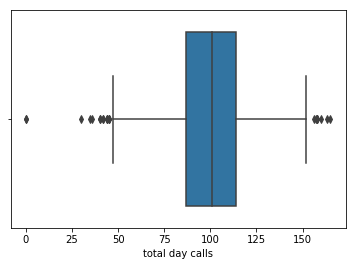

In [88]:
sns.boxplot(x=df_oh['total day calls'])

Izdvojićemo sve numeričke kolone u kojima želimo da tražimo outliere:

In [110]:
numeric_cols = list(df_oh.columns)
numeric_cols = [col for col in numeric_cols if col.find('state') == -1 and col.find('area_code') == -1] # metoda find vraca -1 ako zadati string ne postoji u vecem stringu
numeric_cols.remove('churn')
numeric_cols

['account length',
 'international plan',
 'voice mail plan',
 'number vmail messages',
 'total day minutes',
 'total day calls',
 'total day charge',
 'total eve minutes',
 'total eve calls',
 'total eve charge',
 'total night minutes',
 'total night calls',
 'total night charge',
 'total intl minutes',
 'total intl calls',
 'total intl charge',
 'customer service calls']

Kako bismo identifikovali outliere, računam z-score-ove za naše podatke. Na ovaj način standardizujemo podatke, a svaki broj zapravo govori koliko standardnih devijacija je udaljen određeni podatak od srednje vrednosti. Formula je sledeća:

$$  \frac{x_i–mean(x)}{stdev(x)} $$

In [111]:
def outliers_z_score(ys, threshold = 3):
    mean_y = np.mean(ys)
    stdev_y = np.std(ys)
    z_scores = [(y - mean_y) / stdev_y for y in ys] # primenjujemo formulu
    return np.where(np.abs(z_scores) > threshold) # vraća vrednosti koje se nalaze van 3σ

Funkciji iznad smo kao parametar mogli da porsledimo threshold kojim bi korigovali granicu za outliere. U standardnom slučaju granicu predstavljaju 3 standardne devijacije i sve što bude izvan tog opsega će biti smatrano outlier-om.

Ako metodi prosledimo kolonu "total day calls" dobićemo listu redova koji su outlieri:

In [115]:
outliers_calls = outliers_z_score(df_oh['total day calls'])[0] #vraća 2D niz 
list(outliers_calls)

[468, 692, 740, 1121, 1144, 1345, 1397, 1989, 3187]

In [118]:
outliers = []
for col in numeric_cols:
    outliers += list(outliers_z_score(df_oh[col])[0])
len(outliers)

542

Ako metodu primenimo na sve kolone dobićemo listu svih outliera i možemo videti da ih ima 542

In [120]:
outlier_df = df_oh.iloc[outliers, :] # čuvamo outliere u poseban data
outlier_df.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,area_code_408,area_code_415
phone number,,,,,,,,,,,,,,,,,,,,,
361-6563,224,1,0,0,171.5,99,29.16,160.0,103,13.60,...,0,0,0,0,0,0,0,0,0,0
355-9360,243,0,0,0,95.5,92,16.24,163.7,63,13.91,...,0,0,1,0,0,0,0,0,0,0
386-9177,232,0,0,0,165.6,104,28.15,195.9,115,16.65,...,0,0,0,0,0,0,0,0,1,0
371-2500,225,0,0,0,165.4,106,28.12,273.7,109,23.26,...,0,0,0,0,0,0,0,0,0,1
374-1213,225,0,0,0,182.7,142,31.06,246.5,63,20.95,...,0,0,0,0,0,0,0,0,0,1


In [131]:
outliers_phone_no = list(outlier_df.index.values) #indeksi outliera koje želimo da izbacimo
df = df_oh[~df_oh.index.isin(outliers_phone_no)] # u df čuvamo redove sa indeksima koji se ne poklapaju sa outlierima
df.shape[0] / df_oh.shape[0] 

0.858085808580858

Možemo primetiti da smo sačuvali skoro 86% data seta nakon što smo izbacili outliere :)

### Skaliranje


Kada bismo dodali 1 minut i 1 poruku, naš model bi to posmatrao kao identične promene, što naravno nije tačno, jer je kod poruka to značajna promena, dok je kod minuta to neprimetno. To se dešava zato što naši atributi nisu na istoj skali. Zato, da bismo dobili tačnija predviđanja, mi ćemo sve naše atribute svesti na istu skalu korišćenjem MinMaxScaler-a.

Istražiti ostale:
http://benalexkeen.com/feature-scaling-with-scikit-learn/ <br>

On koristi formulu:
$$ \frac{x_i–min(x)}{max(x)–min(x)} $$ <br>

MinMaxScaler radi na principu da sve vrednosti skalira tako da budu izmedju minimalne i maksimalne vrednosti, pri čemu je minimalna vrednost 0, a maksimalna 1, a zatim merimo za svaku vrednost koliko je udaljena od minimalne i maksimalne vrednosti.<br>
Bolje radi u odnosu na StandardScaler koji smo već pominjali u slučaju da raspodela nije normalna ili da je standardna devijacija jako mala

In [132]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df) # prosleđujemo ceo data frame jer se skaliranje kategoričkih svodi 
                                        # na vrednosti 0 i 1 koje one već imaju
                                        # vraća 2D niz
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,area_code_408,area_code_415
0,0.587963,0.0,1.0,0.510204,0.773921,0.576271,0.773956,0.490079,0.495652,0.490082,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.490741,0.0,1.0,0.530612,0.450281,0.686441,0.450248,0.483796,0.530435,0.483858,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.629630,0.0,0.0,0.000000,0.706066,0.610169,0.706088,0.238095,0.591304,0.238040,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.555556,0.0,1.0,0.489796,0.627267,0.389831,0.627184,0.989749,0.573913,0.989498,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.537037,0.0,0.0,0.000000,0.521889,0.466102,0.521979,1.000000,0.330435,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


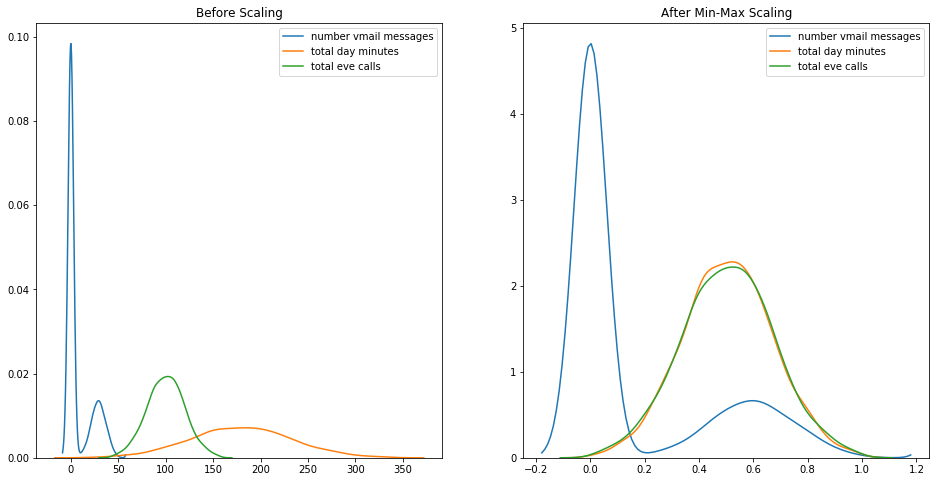

In [135]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 8))
ax1.set_title('Before Scaling')
sns.kdeplot(df['number vmail messages'], ax=ax1)
sns.kdeplot(df['total day minutes'], ax=ax1)
sns.kdeplot(df['total eve calls'], ax=ax1)
ax2.set_title('After Min-Max Scaling')
sns.kdeplot(scaled_df['number vmail messages'], ax=ax2)
sns.kdeplot(scaled_df['total day minutes'], ax=ax2)
sns.kdeplot(scaled_df['total eve calls'], ax=ax2)

Možemo primetiti da je pre skaliranja očekivana vrednost za kolonu "total eve calls" oko 100, a za "total day calls" oko 180, dok je nakon skaliranja očekivana vrednost oba atributa oko 0,5, što znači da su ti podaci podjednako udaljeni od početnih vrednosti, pa se poklapaju

In [137]:
df.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,area_code_408,area_code_415
phone number,,,,,,,,,,,,,,,,,,,,,
382-4657,128,0,1,25,265.1,110,45.07,197.4,99,16.78,...,0,0,0,0,0,0,0,0,0,1
371-7191,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,0,0,0,0,0,0,0,0,0,1
358-1921,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,0,0,0,0,0,0,0,0,0,1
355-9993,121,0,1,24,218.2,88,37.09,348.5,108,29.62,...,0,0,0,0,0,0,0,0,0,0
335-4719,117,0,0,0,184.5,97,31.37,351.6,80,29.89,...,0,0,0,0,0,0,0,0,1,0


Pitanje: šta sada treba da uradimo da bismo izgradili model? Šta treba predvideti?

In [139]:
df.churn.head()

phone number
382-4657    False
371-7191    False
358-1921    False
355-9993    False
335-4719    False
Name: churn, dtype: bool

In [141]:
df['fchurn'] = df.churn.astype('int')
df.drop(columns=['churn'], inplace=True)
df['fchurn'].head()

phone number
382-4657    0
371-7191    0
358-1921    0
355-9993    0
335-4719    0
Name: fchurn, dtype: int64

In [142]:
df.columns

Index(['account length', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls', 'state_AK', 'state_AL',
       'state_AR', 'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC',
       'state_DE', 'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID',
       'state_IL', 'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA',
       'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS',
       'state_MT', 'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ',
       'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR',
       'state_PA', 'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX',
       'state_UT', 'st

In [143]:
X = df.iloc[:, :-1].values 
y = df.iloc[:, -1].values
y[:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [202]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [147]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf=10, random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [149]:
y_pred = classifier.predict(X_test)
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [150]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[750,  12],
       [ 39,  57]])

Možemo primetiti da smo za 750 korisnika dobro predvideli da neće napustiti Telekom mrežu, dok smo za 57 korisnika tačno predvideli da će napustiti mrežu. Za 12 korisnika smo predvideli da će napustiti mrežu, ali oni to neće uraditi, a za 39 korisnika smo predvideli da neće napustiti mrežu, a će oni to uraditi.

In [156]:
tn, fp, fn, tp = cm.ravel()
tn, fp, fn, tp 

(750, 12, 39, 57)

In [153]:
from sklearn.metrics import accuracy_score, recall_score
accuracy_score(y_test, y_pred)

0.9405594405594405

In [154]:
recall_score(y_test, y_pred)

0.59375

In [155]:
df['fchurn'].value_counts(normalize=True)

0    0.89021
1    0.10979
Name: fchurn, dtype: float64

Zaključujemo da naš model nije dobar iz razloga što smo propustili skoro 1/3 klijenata za koje smo trebali da predvidimo da će napustiti mrežu, a razlog zbog kojeg on predviđa na ovaj način je taj što 90% klijenata neće napustiti mrežu, pa shodno tome i model koji smo izgradili nad tim podacima u većini slučajeva predviđa da će klijenti ostati u mreži.

## Nebalansiranost klasa

Kao što smo videli, naš model ne predviđa dovoljno dobro, a razlog tome je što imamo nebalansiranu klasu koju predviđamo. S obzirom da nam nije cilj da imamo visoku tačnost modela, a modelu se potkradu greške ove vrste, koristimo tehnike nebalansiranog učenja (imabalanced learning) kako bismo rešili ovaj problem.

Postoje 3 strategije koje možemo koristiti u zavisnosti od dataset-a:
1. Otežavanje klasa (cost-sensitive learning)
2. Oversampling
3. Undersampling

### Otežavanje klasa (cost-sensitive learning)

Churn može da uzme vrednosti 1(hoće churn-ovati) i 0(neće churn-ovati), to su dve klase koje posmatramo i koje nisu balansirane u ovom slučaju. Prvi način na koji možemo rešiti problem nebalansiranosti je otežavanje klasa. <br>
Ideja jeste da se na osnovu ugrađene funkcije u sklearn-u izračunaju težine obe klase, a onda algoritam neku klasu prilikom pogađanja vrednuje više od druge klase. 

In [159]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight('balanced', np.unique(y_train), y_train)

In [160]:
class_weights

array([0.56109865, 4.59174312])

In [162]:
classifier = DecisionTreeClassifier(criterion = 'entropy', 
                                    min_samples_leaf=10, 
                                    random_state = 0,
                                    class_weight={0 : class_weights[0], 1: class_weights[1]})
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.5610986547085202, 1: 4.591743119266055},
            criterion='entropy', max_depth=None, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=10,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [163]:
y_pred = classifier.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[678,  84],
       [ 30,  66]])

In [164]:
accuracy_score(y_test, y_pred), recall_score(y_test, y_pred)

(0.8671328671328671, 0.6875)

Vidimo da je tačnost modela smanjena, međutim recall je značajno veći. Korisnike za koje smo pogrešno predvideli da neće churn-ovati smo sa 39 smanjili na 30. Povećan je broj korisnika za koje smo pogrešno predvidili da hoće churn-ovati. Ovaj broj je u redu da se povećava ukoliko nam akcije koje preduzimamo kako bismo zadržali korisnike ne stvaraju prevelike troškove.

### Oversample

Kao što i sam naziv kaže, želimo da povećamo broj uzoraka minor klase, u ovom slučaju klase 1. Najčešće korišćen metod je SMOTE - Synthetic Minority Over-sampling Technique. Kako SMOTE funkcioniše? U pozadini koristi kNN i povlači linije između instanci minor klase, te na tim linijama kreira nove instance, što se može videti na slici ispod. Na ovaj način se u većini slučajeva izbegava overfitt-ovanje, mada to je nemoguće u potpunosti izbeći. Više o SMOTE tehnici možete pročitati [ovde](http://rikunert.com/SMOTE_explained).

<img src='https://cdn-images-1.medium.com/max/800/1*uAiwqUNhqaSZmsXCrl9kVQ.png' width = '250' height = '250'/>

Potrebno je, ukoliko vam već nije instalirano, instalirati imblearn. To možete uraditi tako što ćete u conda terminalu otkucati sledeću liniju:

In [169]:
from imblearn.over_sampling import SMOTE

print("Before OverSampling, counts of labels (training set):", sum(y_train==0), sum(y_train==1))
print("Before OverSampling, counts of labels (test set):", sum(y_test==0), sum(y_test==1))

sm = SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print("After OverSampling, counts of labels (training set):", sum(y_train_res==0), sum(y_train_res==1))
print('After OverSampling, counts of labels (test set):', sum(y_test==0), sum(y_test==1))

Before OverSampling, counts of labels (training set): 1784 218
Before OverSampling, counts of labels (test set): 762 96
After OverSampling, counts of labels (training set): 1784 1784
After OverSampling, counts of labels (test set): 762 96


Vidimo da je broj onih koji su churn-ovali izjednačen sa onima koji nisu, a kada imamo više uzoraka model može mnogo bolje da nauči. Bitno je napomenuti da nikada ne radimo oversample na test, već isključivo na trening setu.

In [194]:
from sklearn.linear_model import LogisticRegression
classifier = DecisionTreeClassifier(criterion = 'entropy', 
                                    min_samples_leaf=10, 
                                    random_state = 0)

# classifier = LogisticRegression(penalty='l1', C=6)
classifier.fit(X_train_res, y_train_res)
y_pred = classifier.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[718,  44],
       [ 29,  67]])

In [195]:
accuracy_score(y_test, y_pred), recall_score(y_test, y_pred)

(0.914918414918415, 0.6979166666666666)

### Undersample

Kako možemo povećati broj instanci minor klase, isto tako možemo smanjiti broj instanci major klase. Za to koristimo RandomUnderSampler. 

In [196]:
from imblearn.under_sampling import RandomUnderSampler

print("Before UnderSampling, counts of labels (training set):", sum(y_train==0), sum(y_train==1))
print("Before UnderSampling, counts of labels (test set):", sum(y_test==0), sum(y_test==1))

rus = RandomUnderSampler(random_state=0)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)


print("After UnderSampling, counts of labels (training set):", sum(y_train_res==0), sum(y_train_res==1))
print('After UnderSampling, counts of labels (test set):', sum(y_test==0), sum(y_test==1))


Before UnderSampling, counts of labels (training set): 1784 218
Before UnderSampling, counts of labels (test set): 762 96
After UnderSampling, counts of labels (training set): 218 218
After UnderSampling, counts of labels (test set): 762 96


In [197]:
from sklearn.linear_model import LogisticRegression
classifier = DecisionTreeClassifier(criterion = 'entropy', 
                                    min_samples_leaf=10, 
                                    random_state = 0)

# classifier = LogisticRegression(penalty='l1', C=6)
classifier.fit(X_train_res, y_train_res)
y_pred = classifier.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[603, 159],
       [ 22,  74]])

In [198]:
accuracy_score(y_test, y_pred), recall_score(y_test, y_pred)

(0.789044289044289, 0.7708333333333334)

Ovu tehniku možemo koristiti ukoliko nam nije toliko bitno da li će se broj onih za koje smo pogrešno predvideli da će churn-ovati povećati. Kao što vidimo, taj broj je sa 44 u slučaju korišćenja SMOTE-a porastao na 159 u ovom slučaju. Ukoliko nam to nije isplativo za konkretan poslovni problem ovu tehniku je poželjnije izbeći. <br>
Takođe, ovu tehniku nije poželjno koristiti ukoliko nam podaci ne podležu normalnoj raspodeli.

Znači, zavisi od postavke problema šta ćemo izabrati. Recimo da nama najviše odgovara SMOTE Oversampling. Dalje ćemo raditi sa takvim podacima:

In [203]:
X_train.shape, X_test.shape

((2002, 69), (858, 69))

In [204]:
X_train, y_train = sm.fit_sample(X_train, y_train.ravel())
X_train.shape, X_test.shape

((3568, 69), (858, 69))

Povećali smo količinu podataka u trening skupu, što je dobro jer sa većom količinom podataka ćemo bolje naučiti model. Međutim, mi smo odluku doneli tako što smo gledali metrike na testu. Sada treba i da izaberemo optimalne parametre našeg modela (max_depth, min_samples_leaf i sl.). 

Ako biramo one za koje se postižu najbolji rezultati na testu, moguće da ćemo već overfitovati na testu. U pomoć stiže cross-validacija.

## Cross-Validation

Jedan od načina da izbegnemo overfit usled podešavanja parametara za koje se postiže najbolja tačnost modela na test jeste da podatke ne validiramo na test setu tokom podešavanja parametara. Kako to izvesti? Trening set ćemo podeliti na nekoliko delova. Od tih ćemo jedan izabrati da bude test i ostaviti ga po strani. Na ostalim delovima ćemo učiti model, a onda naučeno testirati na tom "novom" test delu. 

Na ovaj način evaluiramo model dok još radi na trening podacima, utičemo na overfitting i underfitting i možemo da izaberemo onaj model koji će najbolje predviđati na nepoznatim podacima.

In [206]:
from sklearn.model_selection import cross_val_score

tree = DecisionTreeClassifier(criterion = 'entropy', 
                                    min_samples_leaf=10, 
                                    random_state = 0)

cross_val_score(tree, X_train, y_train, cv=5, scoring='accuracy')

array([0.87955182, 0.94257703, 0.94117647, 0.95378151, 0.96348315])

In [214]:
cross_val_score(tree, X_train, y_train, cv=5, scoring='balanced_accuracy')

array([0.87955182, 0.94257703, 0.94117647, 0.95378151, 0.96348315])

In [213]:
cross_val_score(tree, X_train, y_train, cv=5, scoring='recall')

array([0.84033613, 0.95238095, 0.96358543, 0.94957983, 0.95786517])

Cross-validacija nam u ovom obliku ne znači puno, međutim ukoliko je implementiramo u Grid Search može nam pomoći da odredimo parametre modela koji će dati najbolji rezultat.

## Grid Search

Posmatramo dva pojma - hiperparametar i parametar modela. Hiperparametar je karakteristika modela koja je izvan samog modela u smislu da je pre samog fitovanja moramo podesiti. Kao što je k u kNN-u ili max_depth u stablu odlučivanja. Za razliku od toga parametar modela su na primer koeficijenti b0,... linearne regresije koje podešavamo na osnovu podataka koje imamo. 

Grid Search nam služi da odaberemo one hiperparametre koji će rezultirati najboljim rezultatima modela. Definišemo opsege hiperparametara koje želimo da ispitamo i onda prolazimo kroz sve opcije i na kraju biramo onu kombinaciju hiperparametara koja nam daje najbolje rezultate. S obzirom da postoji puno kombinacija koje treba proveriti ovaj proces može potrajati.

In [233]:
from sklearn.model_selection import GridSearchCV, cross_val_score

params_dict = {
    'criterion': ['entropy', 'gini'],
    'min_samples_leaf': range(1,30,3),
    'max_depth': range(2,16,2)
}
tree = DecisionTreeClassifier(random_state = 0)

clf = GridSearchCV(estimator=tree, param_grid= params_dict, n_jobs=-1, verbose=1, scoring='recall')
clf.fit(X_train, y_train)

Fitting 3 folds for each of 140 candidates, totalling 420 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 232 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 420 out of 420 | elapsed:    2.3s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'criterion': ['entropy', 'gini'], 'min_samples_leaf': range(1, 30, 3), 'max_depth': range(2, 16, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=1)

In [234]:
clf.best_score_                                  

0.9517937219730942

Biramo onaj model koji ima najbolji rezultat i dalje ga koristimo za predviđanje.

In [235]:
final_tree = clf.best_estimator_
final_tree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=14,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [231]:
final_tree.fit(X_train, y_train)
y_pred = final_tree.predict(X_test)
accuracy_score(y_test, y_pred), recall_score(y_test, y_pred)

(0.9067599067599068, 0.6875)

In [232]:
confusion_matrix(y_test, y_pred)

array([[712,  50],
       [ 30,  66]])

In [230]:
recall_score(y_test, y_pred)

0.6875

In [243]:
# Set the parameters by cross-validation
tuned_parameters = {
    'criterion': ['entropy', 'gini'],
    'min_samples_split': range(2,40,3),
    'max_depth': range(2,20,2)
}
scores = ['accuracy', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for:", score)
    clf = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, cv=5,
                       scoring=score)
    clf.fit(X_train, y_train)
 
#     print("Grid scores on development set:")
#     means = clf.cv_results_['mean_test_score']
#     stds = clf.cv_results_['std_test_score']
#     for mean, std, params in zip(means, stds, clf.cv_results_['params']):
#         print("%0.3f (+/-%0.03f) for %r"
#               % (mean, std * 2, params))

    y_true, y_pred = y_test, clf.predict(X_test)
    print("Best parameters set found on development set:")
    print(clf.best_params_)
    print(accuracy_score(y_true, y_pred))
    print(recall_score(y_true, y_pred))

# Tuning hyper-parameters for: accuracy
Best parameters set found on development set:
{'criterion': 'entropy', 'max_depth': 14, 'min_samples_split': 2}
0.9137529137529138
0.6875
# Tuning hyper-parameters for: recall
Best parameters set found on development set:
{'criterion': 'entropy', 'max_depth': 14, 'min_samples_split': 2}
0.9114219114219114
0.6770833333333334


In [241]:
clf.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=14,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [244]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=14, min_samples_split=2)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
accuracy_score(y_test, y_pred), recall_score(y_test, y_pred)

(0.9055944055944056, 0.6770833333333334)

U ovom slučaju vidimo da su hiperparametri koji daju najbolji rezultat:
1. criterion - entropy
2. max_depth - 14
3. min_samples_split - 2

## Random Forest

### Ensable algoritmi - Bagging


Ensemble algoritmi zasnivaju se na Karitovoj teoremi porote, pozajmljeno iz političke filozofije. Najbolja odluka ona za koju najviše "procenjivača" glasa. 

Bagging je jedna od najpopularnijih ensemble tehnika. Ukoliko skup X ima N elemenata, tada N puta izvlačimo uzorak, s tim da mogu postojati duplikati. Nad tim novim skupovima(X1,...,Xm) učimo modele i na kraju će classifier biti prosek svih pojedinačnih classifier-a i njega koristimo za dalje predviđanje. 


<img src='https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/img/bagging.png' width = '500' height = '400'/>

U slučaju Random Forest-a, zapravo ćemo iz seta podataka napraviti n random generisanih setova koje ćemo koristiti u izgradnji n stabala odlučivanja, dobiti toliko classifier-a i prosek svih njih odabrati kao clasiffier koji smo definisali sa rfc. Kasnije standardno predviđamo i evaluiramo model.

In [246]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=20, random_state=0)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
accuracy_score(y_test, y_pred), recall_score(y_test, y_pred)

(0.9370629370629371, 0.6145833333333334)

In [260]:
rfc = RandomForestClassifier(max_depth=15, random_state=0, n_jobs=-1)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
accuracy_score(y_test, y_pred), recall_score(y_test, y_pred)

(0.9312354312354313, 0.6354166666666666)

Za problem klasifikacije je poželjno postaviti broj estimatora na koren iz broja osobina. Za problem regresije korisitimo 3*broj osobina kao broj estimatora.


In [262]:
n_features = X.shape[1]
nm_estimator = int(np.sqrt(n_features))
nm_estimator

8

U ovom slučaju je to 8, međutim koristićemo Grid Search kako bismo pronašli one hiperparametre koji će dati najbolje rezultate. Ovaj proces će značajno duže trajati nego prethodni put kad smo koristili GridSearch jer gradi mnogo više stabala i za svaki pojedinačno računa hiperparametre od ranije.

In [263]:
# Set the parameters by cross-validation
tuned_parameters = {
    'min_samples_split': range(2,40,3),
    'max_depth': range(6,20,2),
    'n_estimators' : range(6,14,2)
}
scores = ['accuracy', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for:", score)
    clf = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=5,
                       scoring=score)
    clf.fit(X_train, y_train)


    y_true, y_pred = y_test, clf.predict(X_test)
    print("Best parameters set found on development set:")
    print(clf.best_params_)
    print(accuracy_score(y_true, y_pred))
    print(recall_score(y_true, y_pred))

# Tuning hyper-parameters for: accuracy
Best parameters set found on development set:
{'max_depth': 16, 'min_samples_split': 2, 'n_estimators': 10}
0.9242424242424242
0.5625
# Tuning hyper-parameters for: recall
Best parameters set found on development set:
{'max_depth': 16, 'min_samples_split': 2, 'n_estimators': 12}
0.9335664335664335
0.6458333333333334


In [264]:
rfc = RandomForestClassifier(max_depth=16, min_samples_split=2, n_estimators=12, random_state=0, n_jobs=-1)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
accuracy_score(y_test, y_pred), recall_score(y_test, y_pred)

(0.9324009324009324, 0.6354166666666666)

## Feature Selection

Selekcija osobina na osnovu kojih model predviđa je od izuzetne važnosti jer nije svaka osobina podjednako bitna za sam ishod predviđanja. Svaki od algoritama ima nešto što označava bitnost neke osobine. U linearnoj i logističkoj regresiji su to koeficijenti, dok su u stablu odlučivanja one koje se javljaju više puta u grananju ili se nalaze pri vrhu stabla. 

Imajući ovo u vidu možemo odbaciti one osobine koje nisu značajne za ishod predviđanja i na taj način povećati tačnost našeg prediktivnog modela.

In [286]:
feature_importances = pd.Series(rfc.feature_importances_)
cols = list(df.columns)
cols.remove('fchurn')
feature_names = pd.Series(cols)
features = pd.concat([feature_names, feature_importances], axis=1)
features.columns = ['name', 'importance']
features.sort_values('importance', ascending=False, inplace=True)
features.reset_index(inplace=True, drop=True)
features

,name,importance
0,total day charge,0.143332
1,total day minutes,0.126384
2,customer service calls,0.116625
3,area_code_415,0.070777
4,voice mail plan,0.053225
5,number vmail messages,0.051363
6,area_code_408,0.050360
7,total eve minutes,0.044359
8,total eve charge,0.030554
9,total intl calls,0.027133


Postavljamo kriterijum koji će odrediti koje ćemo osobine koristiti.

In [288]:
features_to_use = list(features.query('importance >= 0.01').name)
features_to_use

['total day charge',
 'total day minutes',
 'customer service calls',
 'area_code_415',
 'voice mail plan',
 'number vmail messages',
 'area_code_408',
 'total eve minutes',
 'total eve charge',
 'total intl calls',
 'total night minutes',
 'total night charge',
 'total day calls',
 'account length',
 'total eve calls',
 'state_SC',
 'total intl minutes',
 'total night calls',
 'total intl charge',
 'state_NJ']

In [292]:
small_df = df.loc[:, features_to_use + ['fchurn']]
small_df.head()

,total day charge,total day minutes,customer service calls,area_code_415,voice mail plan,number vmail messages,area_code_408,total eve minutes,total eve charge,total intl calls,...,total night charge,total day calls,account length,total eve calls,state_SC,total intl minutes,total night calls,total intl charge,state_NJ,fchurn
phone number,,,,,,,,,,,,,,,,,,,,,
382-4657,45.07,265.1,1,1,1,25,0,197.4,16.78,3,...,11.01,110,128,99,0,10.0,91,2.70,0,0
371-7191,27.47,161.6,1,1,1,26,0,195.5,16.62,3,...,11.45,123,107,103,0,13.7,103,3.70,0,0
358-1921,41.38,243.4,0,1,0,0,0,121.2,10.30,5,...,7.32,114,137,110,0,12.2,104,3.29,1,0
355-9993,37.09,218.2,3,0,1,24,0,348.5,29.62,7,...,9.57,88,121,108,0,7.5,118,2.03,0,0
335-4719,31.37,184.5,1,0,0,0,1,351.6,29.89,4,...,9.71,97,117,80,0,8.7,90,2.35,0,0


Nakon što smo kreirali manji dataset, tj. nakon što smo u datasetu ostavili samo one osobine koje su dovoljno bitne potrebno je ponovo skalirati podatke, podeliti set na trening i test deo, primeniti neku od tehnika nebalansiranog učenja i naravno izraditi prediktivni model. 

Bitno je da se feature selection ne radi nad već oversample-ovanim podacima jer može doći do grešaka u proceni bitnosti neke osobine.

In [293]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(small_df)
scaled_df = pd.DataFrame(scaled_df, columns=small_df.columns)
X = scaled_df.iloc[:, :-1].values 
y = scaled_df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
sm = SMOTE(random_state=0)
X_train, y_train = sm.fit_sample(X_train, y_train.ravel())
rfc = RandomForestClassifier(max_depth=16, min_samples_split=2, 
                             n_estimators=12, random_state=0, n_jobs=-1)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
accuracy_score(y_test, y_pred), recall_score(y_test, y_pred)

(0.9248251748251748, 0.6923076923076923)

## Literatura

> 1. [Ways to Detect and Remove the Outliers](https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba)
> 2. [Over-sampling](https://imbalanced-learn.readthedocs.io/en/stable/over_sampling.html), imbalanced-learn
> 3. [Cross-validation](https://towardsdatascience.com/cross-validation-70289113a072)
> 4. [Grid Search for model tuning](https://towardsdatascience.com/grid-search-for-model-tuning-3319b259367e)
> 5. [Bagging](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic05_ensembles_random_forests/topic5_part1_bagging.ipynb?flush_cache=true), Open Machine Learning Course
> 6. [Random Forest](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic05_ensembles_random_forests/topic5_part2_random_forest.ipynb?flush_cache=true),  Open Machine Learning Course
